In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values from 0-255 to 0-1
# This is crucial for neural network performance
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [5]:
# Define class names for plotting later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
model = Sequential([
    # Flattens the 28x28 image into a 1D vector (784 features)
    Flatten(input_shape=(28, 28)),
    
    # First dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    
    # Dropout layer to help prevent overfitting (optional, but good practice)
    Dropout(0.2),
    
    # Second dense layer with 64 neurons
    Dense(64, activation='relu'),
    
    # Output layer with 10 neurons (one for each class)
    # Softmax activation gives probabilities for each class
    Dense(10, activation='softmax')
])

c:\Users\irbag\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use this for integer labels
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# This is the core of the request.
# We will monitor the validation loss ('val_loss').
early_stopping_callback = EarlyStopping(
    monitor='val_loss',     # The metric to watch
    patience=5,             # How many epochs to wait after no improvement
    min_delta=0.001,        # Minimum change to qualify as an improvement
    mode='min',             # We want to 'min'imize the validation loss
    restore_best_weights=True, # Restore model weights from the best epoch
    verbose=1               # Print a message when stopping
)

In [9]:
# We set a high number of epochs (e.g., 50) to *ensure* overfitting
# happens, which allows Early Stopping to trigger.
EPOCHS = 50
BATCH_SIZE = 64

In [10]:
# We use validation_split=0.2 to hold out 20% of the training data
# for validation. The EarlyStopping callback will monitor this data.
history = model.fit(
    x_train, 
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Automatically create a validation set
    callbacks=[early_stopping_callback] # Pass the callback here
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7265 - loss: 0.7840 - val_accuracy: 0.8536 - val_loss: 0.4119
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4233 - val_accuracy: 0.8576 - val_loss: 0.3878
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8579 - loss: 0.3873 - val_accuracy: 0.8656 - val_loss: 0.3699
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8706 - loss: 0.3519 - val_accuracy: 0.8751 - val_loss: 0.3500
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.3438 - val_accuracy: 0.8808 - val_loss: 0.3275
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8799 - loss: 0.3248 - val_accuracy: 0.8763 - val_loss: 0.3398
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.3083 - val_accuracy: 0.8767 - val_loss: 0.3397
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8879 - loss: 0.3007 - val_accuracy: 0.

In [11]:
# Evaluate the model on the unseen test set.
# Because restore_best_weights=True, this model is from the
# epoch with the lowest validation loss, not the final epoch.
print("\n--- Final Model Evaluation (on Test Set) ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


--- Final Model Evaluation (on Test Set) ---
313/313 - 0s - 700us/step - accuracy: 0.8758 - loss: 0.3549
Test Accuracy: 87.58%
Test Loss: 0.3549


In [12]:
# Get the training history
history_dict = history.history

In [13]:
# Get the epoch number where training was stopped
# Note: history.epoch is a list of epochs run, e.g., [0, 1, 2, ..., 15]
stopped_epoch = early_stopping_callback.stopped_epoch
if stopped_epoch > 0:
    print(f"\nTraining stopped early at epoch: {stopped_epoch + 1}")
else:
    print("\nTraining completed all epochs (early stopping did not trigger).")

# Find the epoch with the best validation loss
best_epoch = np.argmin(history_dict['val_loss'])


Training stopped early at epoch: 10


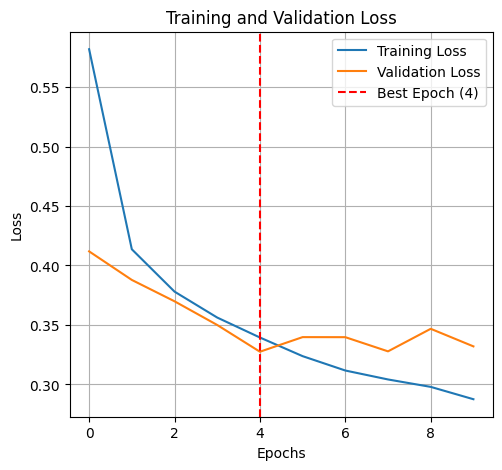

In [14]:
# --- Plot 1: Training & Validation Loss ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Plot a vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', 
            label=f'Best Epoch ({best_epoch})')
plt.legend()
plt.grid(True)

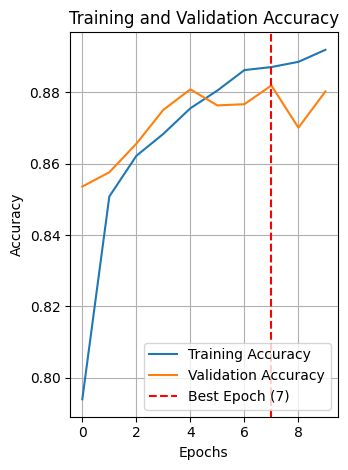

In [15]:
# --- Plot 2: Training & Validation Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Find and plot the best epoch for accuracy
best_epoch_acc = np.argmax(history_dict['val_accuracy'])
plt.axvline(x=best_epoch_acc, color='r', linestyle='--', 
            label=f'Best Epoch ({best_epoch_acc})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()